Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from scipy import stats
from sklearn import svm


import os

In [ ]:
### Check version
import sys
import sklearn
print(sys.version)
!python --version
print("numpy: ", np.__version__)
print("sklearn: ", sklearn.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
Python 3.10.12
numpy:  1.25.2
sklearn:  1.2.2


In [ ]:
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)

Data

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
forest_fires = fetch_ucirepo(id=162)

# data (as pandas dataframes)
X = forest_fires.data.features
y = forest_fires.data.targets

# metadata
print(forest_fires.metadata)

# variable information
print(forest_fires.variables)


{'uci_id': 162, 'name': 'Forest Fires', 'repository_url': 'https://archive.ics.uci.edu/dataset/162/forest+fires', 'data_url': 'https://archive.ics.uci.edu/static/public/162/data.csv', 'abstract': 'This is a difficult regression task, where the aim is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data (see details at: http://www.dsi.uminho.pt/~pcortez/forestfires).', 'area': 'Climate and Environment', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 517, 'num_features': 12, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['area'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2007, 'last_updated': 'Thu Jan 11 2024', 'dataset_doi': '10.24432/C5D88D', 'creators': ['Paulo Cortez', 'Anbal Morais'], 'intro_paper': {'title': 'A data mining approach to predict forest fires using meteorological data', 'authors': 'P. Cortez, A

In [ ]:
import pandas as pd

path = '/content/drive/MyDrive/forest+fires/'
dfmain = pd.read_csv(path + 'forestfires.csv', header=0)
print(dfmain.shape)
dfmain.head(2)

(517, 13)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0


In [ ]:
dfmain['fire_scale'] = dfmain['area'].apply(lambda x: 'no_fire' if (x==0) else
                                                      'small_fire' if ((x>0)&(x<2))else
                                                      'large_fire'
                                           )
print(dfmain.shape)
dfmain.head(2)

(517, 14)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,fire_scale
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,no_fire
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,no_fire


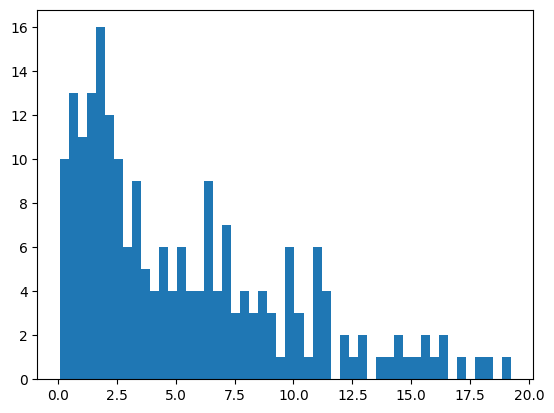

In [ ]:
plt.hist(dfmain[(dfmain['area']>0)&(dfmain['area']<20)].area, bins=50)

plt.show()

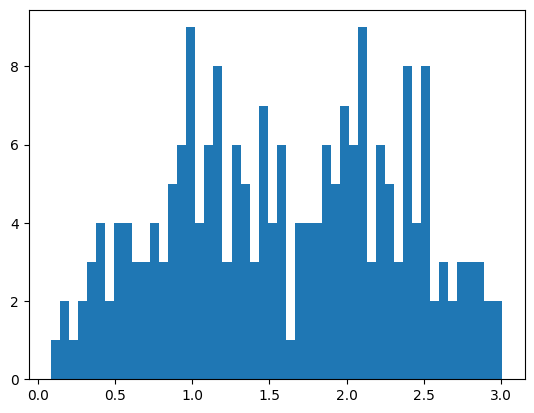

In [ ]:
plt.hist(np.log(dfmain[(dfmain['area']>0)&(dfmain['area']<20)].area + 1), bins=50)

plt.show()

<BarContainer object of 12 artists>

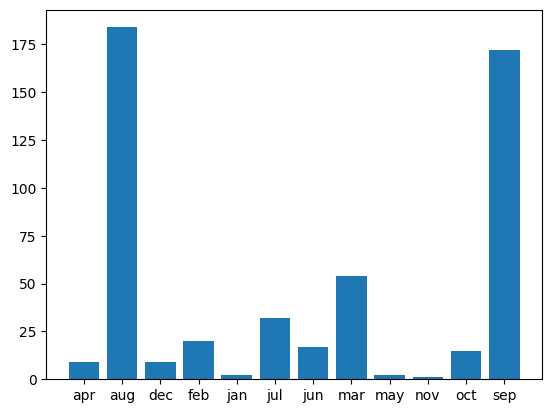

In [ ]:
t = dfmain.groupby(['month'])['month'].count()
plt.bar(t.index, t)

In [ ]:
dfmain.groupby(['month', 'fire_scale'])['fire_scale'].count()

month  fire_scale
apr    large_fire     4
       no_fire        5
aug    large_fire    71
       no_fire       85
       small_fire    28
dec    large_fire     9
feb    large_fire     9
       no_fire       10
       small_fire     1
jan    no_fire        2
jul    large_fire    12
       no_fire       14
       small_fire     6
jun    large_fire     5
       no_fire        9
       small_fire     3
mar    large_fire    16
       no_fire       35
       small_fire     3
may    large_fire     1
       no_fire        1
nov    no_fire        1
oct    large_fire     5
       no_fire       10
sep    large_fire    76
       no_fire       75
       small_fire    21
Name: fire_scale, dtype: int64

<BarContainer object of 7 artists>

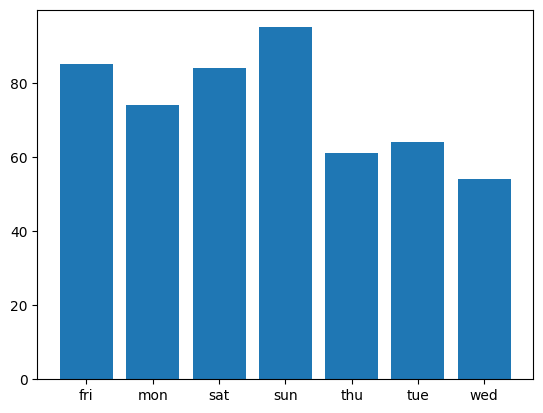

In [ ]:
t = dfmain.groupby(['day'])['day'].count()
plt.bar(t.index, t)

In [ ]:
#d = dfmain.copy()
d = dfmain[dfmain['area']>0].copy()

In [ ]:
print(d.shape)
for m in d['month'].unique():
    if((m!='aug')&(m!='sep')):
        temp = d[d['month']==m].sample(300, replace=True)
        d = pd.concat([d, temp], axis=0)

print(d.shape)



(270, 14)
(2670, 14)


<BarContainer object of 10 artists>

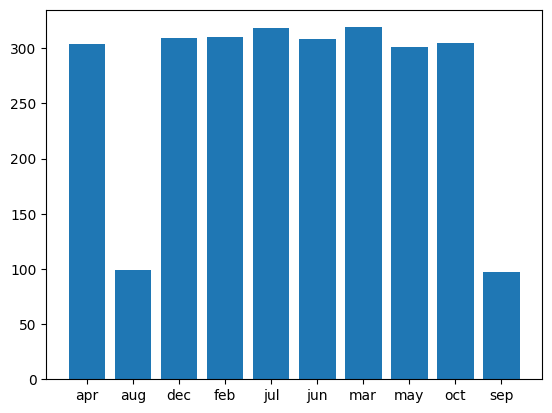

In [ ]:
# plot
t = d.groupby(['month'])['month'].count()
plt.bar(t.index, t)

Regression/Prediction

In [ ]:
X = d.drop(['area', 'fire_scale'], axis=1)
y = d['area']

In [ ]:
X = pd.get_dummies(X, ['month', 'day'])
X.head(2)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,month_apr,month_aug,month_dec,month_feb,month_jul,month_jun,month_mar,month_may,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
138,9,9,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
139,1,4,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False


In [ ]:
x_cols_for_scaling = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, np.log(y+1), shuffle=True)
print(x_train.shape, x_test.shape)

(2002, 27) (668, 27)


Split for scaling

In [ ]:
x_train_orig = x_train.loc[:, x_cols_for_scaling]
x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

x_test_orig = x_test.loc[:, x_train_orig.columns]
x_test_cat = x_test.loc[:, x_train_cat.columns]

StandardScaler

In [ ]:
scl=preprocessing.StandardScaler()
scl.fit(x_train_orig)

x_train_orig = scl.transform(x_train_orig)
x_test_orig = scl.transform(x_test_orig)

# Combine
x_train = np.concatenate([x_train_orig, np.array(x_train_cat)], axis=1)
x_test = np.concatenate([x_test_orig, np.array(x_test_cat)], axis=1)

print(x_train.shape, x_test.shape)

(2002, 27) (668, 27)


Model Selection through lazypredict

In [ ]:
pip install lazypredict

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np

In [ ]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(x_train, x_test, y_train, y_test)

print(models)

 74%|███████▍  | 31/42 [00:07<00:03,  3.57it/s]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [00:09<00:00,  4.38it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000688 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 547
[LightGBM] [Info] Number of data points in the train set: 2002, number of used features: 26
[LightGBM] [Info] Start training from score 2.417587
                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
BaggingRegressor                             0.86       0.87   0.41   
RandomForestRegressor                        0.85       0.86   0.42   
ExtraTreesRegressor                          0.84       0.85   0.43   
XGBRegressor                                 0.84       0.85   0.43   
HistGradientBoostingRegressor                0.84       0.84   0.44   
KNeighborsRegressor                          0.83       0.84   0.45   
LGBMRegressor               

Build the BaggingRegressor and plot the scatter plot

mse:  0.1881
mae:  0.1174
r2:  0.8471


Text(0, 0.5, 'y_pred')

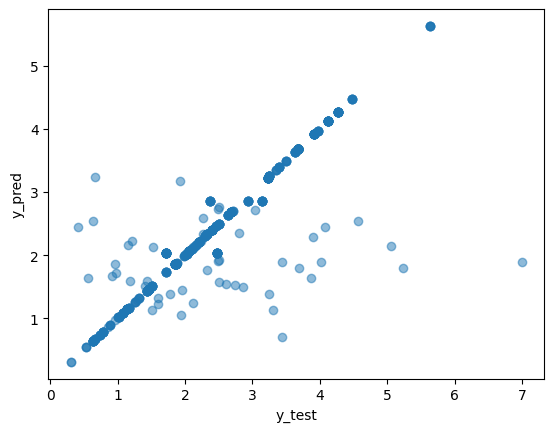

In [ ]:
from sklearn.ensemble import BaggingRegressor
reg = BaggingRegressor()
reg.fit(x_train, y_train)

# Predict
y_pred = reg.predict(x_test)

# Score
mse = metrics.mean_squared_error(y_test, y_pred)
print('mse: ', np.round(mse, 4))

mae = metrics.mean_absolute_error(y_test, y_pred)
print('mae: ', np.round(mae, 4))

r2 = metrics.r2_score(y_test, y_pred)
print('r2: ', np.round(r2, 4))


# Plot
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')